<a href="https://colab.research.google.com/github/Ritisha09/Captcha-Recognize/blob/main/Captcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
# from layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import os

In [ ]:

# define data path
data_dir ="/content/drive/MyDrive/Deep Learning/archive (3)/Dataset"

# Get a list of all the image file names in the directory
image_files = os.listdir(data_dir)

# No of imges in data
print(f'Number of Images found: {len(image_files)}')

# Define the image size
img_height = 128
img_width = 128
img_size=(img_height, img_width)

# Define the batch size
batch_size = 32

# Define a list to hold the images and LABELS
IMAGES = []
LABELS = []

Labels_final =[]

# Loop over each image file
for file in image_files:

    # Load the image
    img = tf.keras.preprocessing.image.load_img(os.path.join(data_dir, file), target_size=img_size)
    # Convert the image to a numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # Normalize the image data
    img_array /= 255.0

    img_array = tf.transpose(img_array, perm=[1,0,2]) #

    # Append the image to the list of images
    IMAGES.append(img_array)

    # Extract the label from the file name (assuming the label is the file name without the file extension)
    label = os.path.splitext(file)[0]
    # Append the label to the list of labels
    LABELS.append(label)

IMAGES = np.array(IMAGES)
LABELS = np.array(LABELS)

# Print the shape of the arrays
print("Images shape:", IMAGES.shape)
print("Labels shape:", LABELS.shape)
print(f'Labels List: {LABELS}')

x_train, x_val, y_train, y_val = train_test_split(IMAGES, LABELS, test_size=0.2, random_state=42)


# Maximum length of a label
max_length = max([len(label) for label in LABELS])
print("Maximum length of a label:" , max_length)

Number of Images found: 2339
Images shape: (2339, 128, 128, 3)
Labels shape: (2339,)
Labels List: ['4dp4x' '4d2d7' '4epd5' ... '2hhye' '2hppf' '2hehn']
Maximum length of a label: 5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMAGES as vector
IMAGES[0], LABELS[0]

(array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 0.],
         [1., 1., 0.],
         [1., 1., 0.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 0.],
         [1., 1., 0.],
         [1., 1., 0.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 0.],
         [1., 1., 0.],
         [1., 1., 0.]]], dtype=float32),
 '4dp4x')

In [ ]:
# Deciding possible characters in a label
CHARACTERS = set(char for label in LABELS for char in label)
max_chars = len(CHARACTERS)
print(max_chars)
print(f'Character List: {CHARACTERS}')

23
Character List: {'4', 'y', 'a', 'e', 'k', 'c', '2', 'd', 'f', 'b', '6', 'g', '7', '3', 'p', 'x', 'w', '5', 'r', '8', 'h', 'n', 'm'}


In [ ]:
char_to_num = layers.StringLookup(vocabulary=list(CHARACTERS),
                                  num_oov_indices=0,
                                  mask_token=None)

num_to_char = layers.StringLookup(vocabulary=char_to_num.get_vocabulary(),
                                  mask_token=None,
                                  num_oov_indices=0,
                                  invert=True)



/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())

  

In [ ]:
size = len(IMAGES)
train_size=0.8

indices = np.arange(size)

# if shuffle:
#     np.random.shuffle(indices)

train_samples = int(size * train_size)

# Split the dataset into training and validation sets
x_train, y_train = IMAGES[indices[:train_samples]], LABELS[indices[:train_samples]]
x_valid, y_valid = IMAGES[indices[train_samples:]], LABELS[indices[train_samples:]]

In [ ]:
# #encode label into one-hot vector

# def encode_label(label):
#     label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
#     label = tf.one_hot(indices=label, depth= max_chars+1)
#     # return {'image': img, 'label':label}
#     print(label)
#     return label

# # Define a tf.data.Dataset object
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# # Use the `map` method to apply `encode_label` to each label in the dataset
# train_dataset = (train_dataset.map(lambda img, label: (img, encode_label(label))).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE))


# val_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
# val_dataset = (val_dataset.map(lambda img, label: (img, encode_label(label))).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE))

####################################################################

# define data path
data_dir ="/content/drive/MyDrive/Deep Learning/archive (3)/Dataset"

# Get a list of all the image file names in the directory
image_files = os.listdir(data_dir)

# No of imges in data
print(f'Number of Images found: {len(image_files)}')

# Define the image size
img_height = 128
img_width = 128
img_size=(img_height, img_width)

# Define the batch size
batch_size = 32

# Define a list to hold the images and LABELS
IMAGES = []
LABELS = []

Labels_vector =[]

# Loop over each image file
for file in image_files:

    # Load the image
    img = tf.keras.preprocessing.image.load_img(os.path.join(data_dir, file), target_size=img_size)
    # Convert the image to a numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # Normalize the image data
    img_array /= 255.0

    # print("sssss", img_array.shape)
    # img_array = tf.transpose(img_array, perm=[1,0,2])
    # print("ffffff" ,img_array.shape)
    # Append the image to the list of images
    IMAGES.append(img_array)

    # Extract the label from the file name (assuming the label is the file name without the file extension)
    label = os.path.splitext(file)[0]
    # Append the label to the list of labels
    LABELS.append(label)

    #trying one-hot encoding
    # print(label , char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8")))
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 3nem3 tf.Tensor([19 15 17  5 19], shape=(5,), dtype=int64)
    label = tf.one_hot(indices=label, depth= max_chars+1)
    # print("1:" ,label)

    # [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    # [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
    # [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
    # [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    # [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

    Labels_vector.append(label)


IMAGES = np.array(IMAGES)
LABELS = np.array(LABELS)
Labels_vector = np.array(Labels_vector)


# Print the shape of the arrays
print("Images shape:", IMAGES.shape)
print("Labels shape:", LABELS.shape)
print("Labels Vector shape:", Labels_vector.shape)
print(f'Labels List: {LABELS}')


# Maximum length of a label
max_length = max([len(label) for label in LABELS])
print("Maximum length of a label:" , max_length)



Number of Images found: 2339
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (128, 128, 3)
sssss (128, 128, 3)
ffffff (

In [ ]:
print(f'Labels Vector: {Labels_vector}')

Labels Vector: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
size = len(IMAGES)
train_size=0.8

indices = np.arange(size)

# if shuffle:
#     np.random.shuffle(indices)

train_samples = int(size * train_size)

# Split the dataset into training and validation sets
x_train, y_train = IMAGES[indices[:train_samples]], Labels_vector[indices[:train_samples]]
x_valid, y_valid = IMAGES[indices[train_samples:]], Labels_vector[indices[train_samples:]]


dataset = tf.data.Dataset.from_tensor_slices((IMAGES, Labels_vector))


# Split the dataset into training and validation sets
train_dataset = dataset.take(train_samples).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = dataset.skip(train_samples).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)


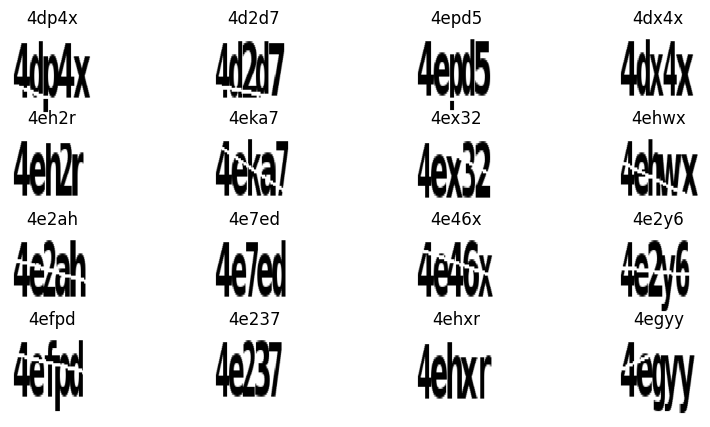

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):

#    images = batch['image']
#    labels = batch['label']
    images = batch[0]
    labels = batch[1]
    # print(batch[1].shape)
    # print('Single Label Shape', labels[0].shape,' Label Value is: ', labels[0])
    for i in range(16):
        img = (images[i]*255).numpy().astype('uint8')
        ori_label = []

        for l in labels[i]:
            ori_label.append(np.argmax(l))

        label = tf.strings.reduce_join(num_to_char(ori_label)).numpy().decode('utf-8')
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap='gray')
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis('off')
plt.show()

Dropout, image size, character

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(IMAGES, Labels_vector, test_size=0.2, random_state=42)

# Define the CNN model
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # layers.Dropout(0,2),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(max_length * (max_chars+1), activation="softmax"),
        layers.Reshape((max_length, max_chars+1)),
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_val, y_val))

Epoch 1/15
59/59 [==============================] - 68s 1s/step - loss: 2.8700 - accuracy: 0.1776 - val_loss: 2.3016 - val_accuracy: 0.3470
Epoch 2/15
59/59 [==============================] - 66s 1s/step - loss: 1.7877 - accuracy: 0.4831 - val_loss: 1.5518 - val_accuracy: 0.5594
Epoch 3/15
59/59 [==============================] - 60s 1s/step - loss: 1.1302 - accuracy: 0.6737 - val_loss: 1.2480 - val_accuracy: 0.6504
Epoch 4/15
59/59 [==============================] - 60s 1s/step - loss: 0.7642 - accuracy: 0.7668 - val_loss: 1.1840 - val_accuracy: 0.6650
Epoch 5/15
59/59 [==============================] - 62s 1s/step - loss: 0.5254 - accuracy: 0.8353 - val_loss: 1.1322 - val_accuracy: 0.6991
Epoch 6/15
59/59 [==============================] - 62s 1s/step - loss: 0.3667 - accuracy: 0.8880 - val_loss: 1.1345 - val_accuracy: 0.7017
Epoch 7/15
59/59 [==============================] - 68s 1s/step - loss: 0.2872 - accuracy: 0.9036 - val_loss: 1.1925 - val_accuracy: 0.7145
Epoch 8/15
59/59 [==

In [ ]:
predicted_labels = model.predict(x_val)
right_count=0
wrong_count= 0
for i in range(len(predicted_labels)):
    # print(predicted_labels.shape)
    # print(f'ssssssssssssss: {predicted_labels[i]}')
    label_indices = np.argmax(predicted_labels[i], axis=1)
    # label = tf.strings.reduce_join(num_to_char(label_indices)).numpy().decode('utf-8')
    actual_label = np.argmax(y_val[i], axis=1)

    pre_label = tf.strings.reduce_join(num_to_char(label_indices)).numpy().decode('utf-8')
    act_label = tf.strings.reduce_join(num_to_char(actual_label)).numpy().decode('utf-8')

    print(f'dsafadsfdfgdgfd: {pre_label}')
    print(f'Actual Label:  {label_indices}')
    print(f'Predicted Label:  {actual_label}')

    if pre_label == act_label:
        print(f"Correctly predicted label for image {i}")
        right_count +=1
    else:
        print(f"Incorrectly predicted label for image {i}")
        wrong_count +=1


15/15 [==============================] - 6s 382ms/step
dsafadsfdfgdgfd: 62hhf
Actual Label:  [10  6 20 20  8]
Predicted Label:  [10 17 20  9  8]
Incorrectly predicted label for image 0
dsafadsfdfgdgfd: 358hy
Actual Label:  [13 17 19 20  1]
Predicted Label:  [13 10 19 20  1]
Incorrectly predicted label for image 1
dsafadsfdfgdgfd: 5kxf8
Actual Label:  [17  4 15  8 19]
Predicted Label:  [17  9 15  8 19]
Incorrectly predicted label for image 2
dsafadsfdfgdgfd: 227px
Actual Label:  [ 6  6 12 14 15]
Predicted Label:  [ 6 17 12 11 15]
Incorrectly predicted label for image 3
dsafadsfdfgdgfd: 52x5x
Actual Label:  [17  6 15 17 15]
Predicted Label:  [17  6  1 17 15]
Incorrectly predicted label for image 4
dsafadsfdfgdgfd: 3fy57
Actual Label:  [13  8  1 17 12]
Predicted Label:  [13 20 15 12 12]
Incorrectly predicted label for image 5
dsafadsfdfgdgfd: 62emn
Actual Label:  [10  6  3 22 21]
Predicted Label:  [10 19  2 21 22]
Incorrectly predicted label for image 6
dsafadsfdfgdgfd: 6wre3
Actual Label

In [ ]:
print(f'Correctly Predicted: {right_count}')
print(f'Wrongly Predicted: {wrong_count}')


Correctly Predicted: 107
Wrongly Predicted: 361


In [ ]:
ans = model.predict(x_val[0])
print(ans)

In [ ]:
# Get the predicted label vector for the input image
img = IMAGES[0]
img = np.expand_dims(img, axis=0)  # Add a new axis for batch size
pred = model.predict(img)
print(pred)

# Decode the predicted label vector into text
label_indices = np.argmax(pred, axis = 2)

# for idx in label_indices:
#     if idx > 0:
#         text += CHARACTERS[idx-1]

print(label_indices)

1/1 [==============================] - 0s 95ms/step
[[[5.27810196e-09 2.77506906e-09 8.47070851e-12 5.09925893e-20
   3.86405603e-27 2.02355455e-19 2.70342456e-22 2.53157903e-19
   8.00424743e-07 3.90693823e-18 2.72211908e-33 2.20730485e-29
   4.10787686e-17 2.49903766e-04 2.66222452e-28 1.13003932e-26
   3.03573669e-25 1.51116530e-22 9.99417305e-01 1.18050545e-25
   4.28815401e-24 1.12852895e-23 6.23385847e-29 2.37629888e-30]
  [7.14632566e-17 6.10370919e-21 2.19856858e-11 1.41536544e-12
   6.29382590e-09 7.45959284e-12 3.52162778e-15 9.24517023e-18
   4.86764788e-17 4.10829839e-18 1.14040001e-11 1.35702891e-13
   5.74115747e-18 3.26132811e-13 1.93511542e-18 7.55812212e-21
   6.53729349e-13 5.88104272e-13 6.23532970e-15 4.26659643e-14
   2.80642132e-16 6.04823664e-16 1.62503535e-19 1.26841892e-22]
  [2.19798988e-11 1.29380962e-13 2.91279569e-08 8.62457767e-08
   1.01288183e-14 4.14159700e-13 2.66241890e-12 6.91170468e-16
   5.49195481e-11 1.36118696e-13 1.84469814e-10 4.46997081e-19
 

In [ ]:
print(label_indices)
label = tf.strings.reduce_join(num_to_char(label_indices)).numpy().decode('utf-8')
print(label)
print(LABELS[0])

[[18  4 21 18  5]]
4dp4x
4dp4x


In [ ]:
5//4

0

In [ ]:
1%4

1